## Introduction

### What’s pandas?
It's an open source Python-based
data analysis library. It provides high-performance and easy-to-use data structures
and data analysis tools built with the Python programming language. It's build upon Numpy.

### Why is pandas so powerful?
Because it leans upon other
packages in the Python ecosystem, such as SciPy, NumPy, scikit-learn, and upon
graphics libraries such as matplotlib and ggvis for data visualization. It's
able to leverage an extensive network of robust Python frameworks already built
and tested elsewhere

### What’s IPython notebooks?
IPython Notebooks provide a web-based interactive computational environment, allowing
the combination of:
* code
* text
* mathematics
* plots
* right media 

into a web-based document. 
IPython Notebooks run in a browser and contain Python code that is run
in a local or server-side Python session that the notebooks communicate with using
WebSockets. 

### What're the main objects used in Pandas?
Series & DataFrames

## Pandas initialization

In [37]:
# import numpy and pandas, and DataFrame / Series
import numpy as np
import pandas as pd
from pandas import DataFrame, Series #Since they're frquently used we import them to global namespace to use them without pd prefix

# Set some pandas options for output formatting
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
 
# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#pd.options.display.mpl_style = 'default'

## Series object

In [38]:
s = Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

<b>Notice that</b> the column on the left is not a part of the series Instead it's the index of each entry
Pandas automatically gives an index starting at zero.

In [39]:
s[[1,3]]

1    2
3    4
dtype: int64

<b>Notice</b> how we accessed multiple items.

In [40]:
s=Series([1,2,3,4], index=['aa', 'b', 'c', 'd'])
s

aa    1
b     2
c     3
d     4
dtype: int64

In [41]:
s[['aa','b']]

aa    1
b     2
dtype: int64

In [42]:
s[[0, 1]]

aa    1
b     2
dtype: int64

In [43]:
s.index
#The index is itself actually a pandas object.

Index(['aa', 'b', 'c', 'd'], dtype='object')

In [44]:
# create a Series who's index is a series of dates
# between the two specified dates (inclusive)
dates = pd.date_range('2014-07-01', '2014-07-06')
dates

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06'],
              dtype='datetime64[ns]', freq='D')

<b>Note that:</b> This has created a special index in pandas referred to as a "DatetimeIndex"

In [45]:
temps1 = Series([80, 82, 85, 90, 83, 87], index=dates)
temps1

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, dtype: int64

In [46]:
temps1.mean() # calculates the mean of the values in the Series provided by Numpy

84.5

In [47]:
# the following aligns the two by their index values
# and calculates the difference at those matching labels
# Unmatching index will give you wrong output

temps2 = Series([70, 75, 69, 83, 79, 77],
 index = dates)
tempDifs = temps1 - temps2
tempDifs

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

<b>Notice that:</b>
The result of an arithmetic operation (+, -, /, *, …) on two
Series objects that are non-scalar values returns another
Series object.

## DataFrame object
A pandas Series represents a single array of values, with an index label for each
value. If you want to have more than one Series of data that is aligned by a common
index, then a pandas DataFrame is used.


### Initializing 

In [48]:
# create a DataFrame from the two series objects temp1 and temp2
# and give them column names
temps_df = DataFrame( {'Missoula': temps1, 'Philadelphia': temps2})
temps_df

            Missoula  Philadelphia
2014-07-01        80            70
2014-07-02        82            75
2014-07-03        85            69
2014-07-04        90            83
2014-07-05        83            79
2014-07-06        87            77

### Indexing

In [49]:
temps_df['Missoula']

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [50]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2014-07-01            70        80
2014-07-02            75        82
2014-07-03            69        85
2014-07-04            83        90
2014-07-05            79        83
2014-07-06            77        87

In [51]:
#if the name of a column does not have spaces, you can use 
#property-style names to access the columns in a DataFrame.
temps_df.Missoula

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [52]:
temps_df.columns

Index(['Missoula', 'Philadelphia'], dtype='object')

### Arithmetic operations & Indexing cont.

In [53]:
temps_df.Missoula - temps_df.Philadelphia

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

<b>Notic that:</b> Arithmetic operations between columns within a DataFrame are identical in
operation to those on multiple Series as each column in a DataFrame is a Series. 

In [54]:
temps_df['Difference'] = tempDifs
temps_df

            Missoula  Philadelphia  Difference
2014-07-01        80            70          10
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

In [55]:
temps_df[1:4]

            Missoula  Philadelphia  Difference
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7

In [56]:
#Access rows by index
#It returns a Series with DataFrame columns as index labels

temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2014-07-02 00:00:00, dtype: int64

In [57]:
#Access rows via index label
temps_df.loc['2014-07-02']

Missoula        82
Philadelphia    75
Difference       7
Name: 2014-07-02 00:00:00, dtype: int64

In [58]:
#Access rows and columns
temps_df.iloc[[1,3,5]].Difference

2014-07-02     7
2014-07-04     7
2014-07-06    10
Freq: 2D, Name: Difference, dtype: int64

### Indexing with logical operations

In [59]:
# return the rows where the temps for Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

## Loading data from files 

In [60]:
# read the contents of the file into a DataFrame
df = pd.read_csv('test1.csv')
df

                  date         0         1         2
0  2000-01-01 00:00:00  1.103763 -1.909979 -0.808956
1  2000-01-02 00:00:00  1.188917  0.581120  0.861597
2  2000-01-03 00:00:00 -0.964200  0.779764  1.829062
3  2000-01-04 00:00:00  0.782130 -1.720670 -1.108242
4  2000-01-05 00:00:00 -1.867017 -0.528368 -2.488309
5  2000-01-06 00:00:00  2.569280 -0.471901 -0.835033
6  2000-01-07 00:00:00 -0.399323 -0.676427 -0.011256
7  2000-01-08 00:00:00  1.642993  1.013420  1.435667
8  2000-01-09 00:00:00  1.147308  2.138000  0.554171
9  2000-01-10 00:00:00  0.933766  1.387155 -0.560143

In [61]:
type(df.date[0])

str

<b>Notice that:</b> Pandas has no idea that the "date" column contains date objects it treated it like a string.

In [62]:
# read the data and tell pandas the date column should be
# a date in the resulting DataFrame
df = pd.read_csv('test1.csv', parse_dates=['date'])
df

        date         0         1         2
0 2000-01-01  1.103763 -1.909979 -0.808956
1 2000-01-02  1.188917  0.581120  0.861597
2 2000-01-03 -0.964200  0.779764  1.829062
3 2000-01-04  0.782130 -1.720670 -1.108242
4 2000-01-05 -1.867017 -0.528368 -2.488309
5 2000-01-06  2.569280 -0.471901 -0.835033
6 2000-01-07 -0.399323 -0.676427 -0.011256
7 2000-01-08  1.642993  1.013420  1.435667
8 2000-01-09  1.147308  2.138000  0.554171
9 2000-01-10  0.933766  1.387155 -0.560143

In [63]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [64]:
#Choosing index column instead of a numeric index
df = pd.read_csv('test1.csv', parse_dates=['date'], index_col='date')
df

                   0         1         2
date                                    
2000-01-01  1.103763 -1.909979 -0.808956
2000-01-02  1.188917  0.581120  0.861597
2000-01-03 -0.964200  0.779764  1.829062
2000-01-04  0.782130 -1.720670 -1.108242
2000-01-05 -1.867017 -0.528368 -2.488309
2000-01-06  2.569280 -0.471901 -0.835033
2000-01-07 -0.399323 -0.676427 -0.011256
2000-01-08  1.642993  1.013420  1.435667
2000-01-09  1.147308  2.138000  0.554171
2000-01-10  0.933766  1.387155 -0.560143

In [65]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

## Loading data from the Web

In [67]:
# imports for reading data from Yahoo!
df = pd.read_csv("http://censusdata.ire.org/06/all_050_in_06.P1.csv")
df.head(5)

   GEOID  SUMLEV  STATE  COUNTY   CBSA  ...   HU100  POP100.2000  HU100.2000  \
0   6001      50      6       1  41860  ...  582549      1443741      540183   
1   6003      50      6       3  99999  ...    1760         1208        1514   
2   6005      50      6       5  99999  ...   18032        35100       15035   
3   6007      50      6       7  17020  ...   95835       203171       85523   
4   6009      50      6       9  99999  ...   27925        40554       22946   

   P001001  P001001.2000  
0  1510271       1443741  
1     1175          1208  
2    38091         35100  
3   220000        203171  
4    45578         40554  

[5 rows x 15 columns]

## Visualizing data

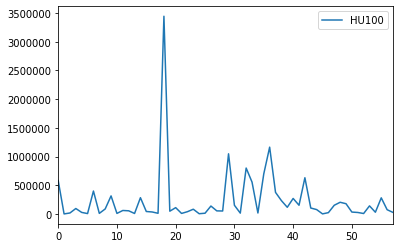

In [70]:
df.plot(y='HU100');